# Automated ML Pipeline Generator using TPOT in Python
---
<br/>

### What is TPOT?
- Tree-Based Pipeline Optimization Tool (TPOT)
- a tool that optimizes machine learning pipelines using genetic programming. 
- exploring thousands of possible pipelines to find the best one for your data. 
- Once TPOT is finished searching (or you get tired of waiting), it provides you with the Python code for the best pipeline it found so you can tinker with the pipeline from there. 
- TPOT makes use of the Python-based scikit-learn library as its ML menu.
- pipeline is an independently executable workflow of a complete machine learning task.

### To install :
    pip install tpot

### Dependencies :
- scikit learn
- numpy 

___

In [1]:
# import libraries
import numpy as np
import pandas as pd

In [2]:
data_url = "https://raw.githubusercontent.com/20b2122/AutoML-using-TPOT-in-python/main/Voice/voice.csv"

In [3]:
df = pd.read_csv(data_url)

In [4]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
# Checking for missing data
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

### Convert Categorical (label) to Numerical

In [7]:
df['label'] = df['label'].map({'female': 1, 'male': 0})

In [8]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0


In [9]:
df.info() # double check if all of the categorical has been converted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   int6

### Splitting data into input and output (label)

In [10]:
x = df.iloc[:,:20] # input
y = df.iloc[:,20:] # output - label

---

## TPOT

In [11]:
import tpot
import time # to calculate how long it takes for the TPOT to finish execute

C:\Users\DELL\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


### Check the available methods and attributes at TPOT

Using this dataset, we will use TPOTClassifier

In [12]:
dir(tpot)

['TPOTClassifier',
 'TPOTRegressor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'base',
 'builtins',
 'config',
 'decorators',
 'driver',
 'export_utils',
 'gp_deap',
 'gp_types',
 'main',
 'metrics',
 'operator_utils',
 'tpot']

### Split the data in x and y into train and test

In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [14]:
from tpot import TPOTClassifier

# Init
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2)

**Generation**: Number of iterations to run the pipeline optimization process.TPOT will work better when you give it more generations (and therefore time) to optimize the pipeline. <br/>
<br/>

**Population Size**: Number of individuals to retain in the GP population every generation.<br/>
<br/>
TPOT will evaluate POPULATION_SIZE (50) + GENERATIONS (5) x OFFSPRING_SIZE (50) = 300 pipelines in total.
<br/>
By default, OFFSPRING_SIZE = POPULATION_SIZE<br/>
<br/>

**Verbosity**: How much information TPOT communicates while it is running. 0 = none, 1 = minimal, 2 = high, 3 = all.

In [15]:
start = time.time()

# Fit data
tpot.fit(x_train, y_train)

end = time.time()

C:\Users\DELL\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                                                                              
Generation 1 - Current best internal CV score: 0.9828564456103959
                                                                              
Generation 2 - Current best internal CV score: 0.9828564456103959
                                                                              
Generation 3 - Current best internal CV score: 0.9828564456103959
                                                                              
Generation 4 - Current best internal CV score: 0.9833089296971915
                                                                              
Generation 5 - Current best internal CV score: 0.9833089296971915
                                                                              
Best pipeline: GradientBoostingClassifier(CombineDFs(input_matrix, input_matrix), learning_rate=0.5, max_depth=5, max_features=0.1, min_samples_leaf=15, min_samples_split=2, n_estimators=100, subs

**Gradient Boosting Classifier**: a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting.

By default, accuracy is used for classification and mean squared error (MSE) is used for regression.

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = tpot.predict(x_test)

print('\ntime:',(end-start))
print('Mean Absolute Error:',mean_absolute_error(y_pred=y_pred, y_true=y_test))
print('Mean Squared Error:',mean_squared_error(y_pred=y_pred, y_true=y_test))
print('Coef of Determination, R2:',r2_score(y_pred=y_pred, y_true=y_test))
print('Accuracy from tpot',tpot.score(x_test,y_test))


time: 737.4866428375244
Mean Absolute Error: 0.019978969505783387
Mean Squared Error: 0.019978969505783387
Coef of Determination, R2: 0.9198884494653023
Accuracy from tpot 0.9800210304942166


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py:765: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


**MAE**: measures the average of the residuals in the dataset.

**MSE**: average of the squared difference between the original and predicted values in the data set. Measures the variance of the residuals.

**$R^{2}$**: represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

In [17]:
# Export the result
tpot.export('TPOTClassifier_ml_pipeline.py')

#### The 'TPOTClassifier_ml_pipeline.py' file will contain the Python code for the optimized pipeline.

In [49]:
import IPython

IPython.display.Code('https://raw.githubusercontent.com/20b2122/AutoML-using-TPOT-in-python/main/Voice/TPOTClassifier_ml_pipeline.py')

import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from sklearn.preprocessing import FunctionTransformer
from copy import copy

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=None)

# Average CV score on the training set was: 0.9833089296971915
exported_pipeline = make_pipeline(
    make_union(
        FunctionTransformer(copy),
        FunctionTransformer(copy)
    ),
    GradientBoostingClassifier(learning_rate=0.5, max_depth=5, max_features=0.1, min_samples_leaf=15, min_samples_split=2, n_estimators=100, subsample=0.6000000000000001)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

___

### Prediction

- preparing the predicted(y_pred) data to be shown in a table with x_test and y_test data

In [19]:
# to ensure one the tables are joined the data are aligned
sort_x = x_test.sort_index()
new_x = sort_x.reset_index().drop(columns=['index'])

sort_y = y_test.sort_index()
new_y = sort_y.reset_index().drop(columns=['index'])

# converting the array into list then into a table
new_y_pred = tpot.predict(new_x).tolist() 
predictions = pd.DataFrame({ 'pred_label':new_y_pred }) 

new_table = pd.concat([new_x, new_y, predictions], axis=1)
new_table

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label,pred_label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0,0
1,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,0,0
2,0.137343,0.080877,0.124263,0.083145,0.209227,0.126082,1.378728,5.008952,0.963514,0.736150,...,0.092644,0.016789,0.213333,0.481671,0.015625,5.015625,5.000000,0.088500,0,0
3,0.183115,0.066982,0.191233,0.129149,0.240152,0.111004,3.568104,35.384748,0.940333,0.571394,...,0.102799,0.020833,0.275862,1.245739,0.203125,6.742188,6.539062,0.139332,0,0
4,0.171247,0.074872,0.152807,0.122391,0.243617,0.121227,3.207170,25.765565,0.936954,0.586420,...,0.079718,0.015671,0.262295,0.106279,0.007812,0.570312,0.562500,0.138355,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,0.201806,0.036057,0.201622,0.178165,0.227872,0.049707,1.585353,4.945634,0.884731,0.227903,...,0.191704,0.032720,0.275862,0.593750,0.007812,5.921875,5.914062,0.124383,1,1
947,0.183667,0.040607,0.182534,0.156480,0.207646,0.051166,2.054138,7.483019,0.898138,0.313925,...,0.149237,0.018648,0.262295,0.550312,0.007812,3.421875,3.414062,0.166503,1,1
948,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,1,1
949,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,1,1


In [40]:
wrong_prediction = np.where(new_table['label'] != new_table['pred_label'])
# print(wrong_prediction)
print("Total number of test sample wrongly predicted:",len(wrong_prediction[0]))

Total number of test sample wrongly predicted: 19


In [27]:
indexes = wrong_prediction

new_table.iloc[indexes]

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label,pred_label
20,0.167334,0.047178,0.161802,0.135475,0.180725,0.045250,3.961908,24.419622,0.880375,0.344307,...,0.141810,0.016032,0.253968,0.578125,0.125000,6.921875,6.796875,0.021648,0,1
23,0.200830,0.053066,0.210059,0.185332,0.236198,0.050866,1.840901,6.006801,0.907683,0.386818,...,0.165155,0.015764,0.271186,1.067057,0.070312,5.593750,5.523438,0.336376,0,1
90,0.224382,0.048547,0.240617,0.220672,0.255481,0.034809,3.095413,15.076874,0.858363,0.130449,...,0.138002,0.031873,0.275862,0.897866,0.007812,5.734375,5.726562,0.176654,0,1
167,0.138336,0.085693,0.126748,0.060881,0.238669,0.177788,2.668286,13.514607,0.943047,0.611900,...,0.138233,0.016360,0.275862,1.106213,0.007812,4.421875,4.414062,0.230973,0,1
174,0.160468,0.077851,0.149529,0.125194,0.239979,0.114785,2.907550,19.862833,0.940861,0.610161,...,0.141772,0.016967,0.266667,0.350507,0.007812,4.882812,4.875000,0.119712,0,1
175,0.137655,0.084477,0.133981,0.072697,0.222624,0.149927,3.999052,42.125516,0.933738,0.575355,...,0.148467,0.039216,0.271186,0.280273,0.007812,4.453125,4.445312,0.107741,0,1
182,0.129003,0.070466,0.134949,0.070524,0.170783,0.100259,1.298188,4.588312,0.964036,0.727164,...,0.139353,0.019208,0.228571,0.298573,0.031250,3.609375,3.578125,0.103764,0,1
183,0.125830,0.077782,0.128703,0.055812,0.170730,0.114918,1.330019,5.444218,0.967389,0.712792,...,0.136684,0.015810,0.275862,0.242898,0.007812,5.492188,5.484375,0.052860,0,1
184,0.145676,0.066909,0.145363,0.116707,0.172739,0.056032,1.928249,6.910776,0.935388,0.564341,...,0.120921,0.015764,0.205128,0.360625,0.023438,5.000000,4.976562,0.062794,0,1
215,0.092579,0.080289,0.066576,0.016433,0.166652,0.150218,3.570619,19.677106,0.931496,0.617675,...,0.160002,0.021080,0.246154,0.698017,0.007812,5.703125,5.695312,0.139808,0,1


Out of 951 data, only 19 are not prediccted correctly.

Test - ROC Curve: 



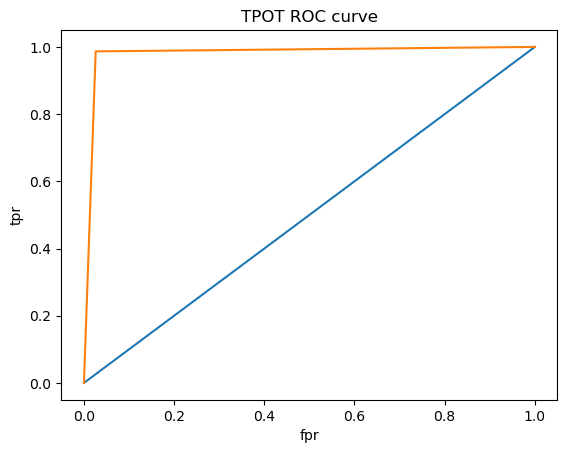

Test - AUC: 
 0.9803367797541986


In [50]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# print(f"Test - Accuracy :  {accuracy_score(y_test, predictions)*100.0:.2f}%")
# print("Test - Classification Report: \n", metrics.classification_report(y_test, predictions))

print("Test - ROC Curve: \n")
fpr, tpr, thresholds = roc_curve(new_y, predictions)
plt.plot([0,1], [0,1])
plt.plot(fpr, tpr, label='TPOT')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('TPOT ROC curve')
plt.show()

print('Test - AUC: \n', roc_auc_score(new_y, predictions))

Test - Confusion Matrix: 



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

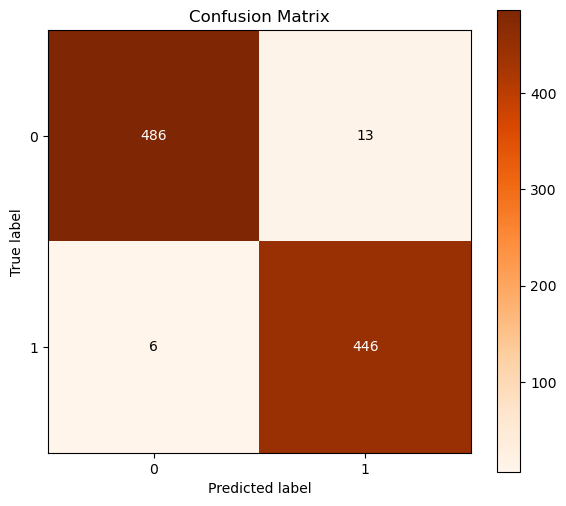

In [37]:
#Confusion Matrix
import scikitplot as skplt

print("Test - Confusion Matrix: \n")

fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(new_y, predictions,
                                    title="Confusion Matrix",
                                    cmap="Oranges",
                                    ax=ax1)